In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('grid_search_old_and_good.csv')

In [3]:
df[df['error'] == 1].groupby('train_samples')['error'].sum()

train_samples
1     12
2     13
5     13
10    13
15    13
20    20
30    22
50    13
Name: error, dtype: int64

In [4]:
print(f'Всего было {df.shape[0]} запусков из которых {df[df['error'] == 0].shape[0]} завершились успешно')

Всего было 376 запусков из которых 257 завершились успешно


In [5]:
pd.DataFrame(df[df['error'] == 1].groupby(['l1_ratio', 'penalizer']).size())

0
l1_ratio   penalizer    
0.001000   0.001000    7
           0.316228    2
0.017783   0.001000    8
           0.316228    1
           5.623413    4
           100.000000  2
0.316228   0.001000    7
           0.017783    2
           0.316228    2
           5.623413    2
           100.000000  2
5.623413   0.001000    8
           0.017783    8
           0.316228    8
           5.623413    8
           100.000000  8
100.000000 0.001000    8
           0.017783    8
           0.316228    8
           5.623413    8
           100.000000  8

In [6]:
df.groupby('train_samples')['error'].sum()

train_samples
1     12
2     13
5     13
10    13
15    13
20    20
30    22
50    13
Name: error, dtype: int64

Результат с лучшими параметрами по каждой из метрик

In [7]:
df[df['test_statistic'] == df['test_statistic'].max()]

,train_samples,test_samples,l1_ratio,penalizer,p_val,test_statistic,ci_train_same_size,ci_train_max_size,ci_test,ibs_train_same_size,ibs_train_max_size,ibs_test,train_time,test_time,error,error_text,model_id
105,5,1.0,0.001,0.017783,0.0,3052.13722,0.81866,0.821797,0.804272,0.20629,0.235122,0.120174,111.065577,268.636698,0,NaN,52
106,5,10.0,0.001,0.017783,0.0,3052.13722,0.81866,0.821797,0.832227,0.20629,0.235122,0.224564,111.065577,277.295718,0,NaN,52
107,5,25.0,0.001,0.017783,0.0,3052.13722,0.81866,0.821797,0.833610,0.20629,0.235122,0.235649,111.065577,295.250326,0,NaN,52


In [8]:
df[df['ci_train_same_size'] == df['ci_train_same_size'].min()]

,train_samples,test_samples,l1_ratio,penalizer,p_val,test_statistic,ci_train_same_size,ci_train_max_size,ci_test,ibs_train_same_size,ibs_train_max_size,ibs_test,train_time,test_time,error,error_text,model_id
69,2,1.0,0.017783,0.017783,1.0,-1.817806e+06,0.201144,0.178611,0.209797,0.252192,0.404252,0.178758,89.379234,253.422522,0,NaN,32
70,2,10.0,0.017783,0.017783,1.0,-1.817806e+06,0.201144,0.178611,0.180394,0.252192,0.404252,0.372479,89.379234,261.082814,0,NaN,32
71,2,25.0,0.017783,0.017783,1.0,-1.817806e+06,0.201144,0.178611,0.177282,0.252192,0.404252,0.396084,89.379234,278.784878,0,NaN,32


In [9]:
df[df['ci_test'] == df['ci_test'].max()]

,train_samples,test_samples,l1_ratio,penalizer,p_val,test_statistic,ci_train_same_size,ci_train_max_size,ci_test,ibs_train_same_size,ibs_train_max_size,ibs_test,train_time,test_time,error,error_text,model_id
107,5,25.0,0.001,0.017783,0.0,3052.13722,0.81866,0.821797,0.83361,0.20629,0.235122,0.235649,111.065577,295.250326,0,NaN,52


In [10]:
df[df['ibs_train_same_size'] == df['ibs_train_same_size'].min()]

,train_samples,test_samples,l1_ratio,penalizer,p_val,test_statistic,ci_train_same_size,ci_train_max_size,ci_test,ibs_train_same_size,ibs_train_max_size,ibs_test,train_time,test_time,error,error_text,model_id
6,1,1.0,0.001,0.316228,0.0,1645.446229,0.794996,0.822148,0.808055,0.110155,0.23234,0.111227,34.571033,234.152239,0,NaN,3
7,1,10.0,0.001,0.316228,0.0,1645.446229,0.794996,0.822148,0.825519,0.110155,0.23234,0.219345,34.571033,245.839496,0,NaN,3
8,1,25.0,0.001,0.316228,0.0,1645.446229,0.794996,0.822148,0.826993,0.110155,0.23234,0.231705,34.571033,262.115837,0,NaN,3


In [11]:
df[(df['ibs_test'] == df['ibs_test'].min())]

,train_samples,test_samples,l1_ratio,penalizer,p_val,test_statistic,ci_train_same_size,ci_train_max_size,ci_test,ibs_train_same_size,ibs_train_max_size,ibs_test,train_time,test_time,error,error_text,model_id
6,1,1.0,0.001,0.316228,0.0,1645.446229,0.794996,0.822148,0.808055,0.110155,0.23234,0.111227,34.571033,234.152239,0,NaN,3


# Графики

In [12]:
df = df[df['error'] != 1]
# А что если убрать еррроры????

In [13]:
import matplotlib.pyplot as plt
def draw_pandas_plot(df, metric, ticks, test_samples=1, ax=None):
    metric_df = df[df['test_samples'] == test_samples].groupby('train_samples')[metric].agg(['mean', 'min', 'max'])
    if not ax is None:
        ax.plot(metric_df)
        ax.set_yticks(ticks)
        ax.set_ylabel(metric)
        return 0
    return plt.plot(metric_df)

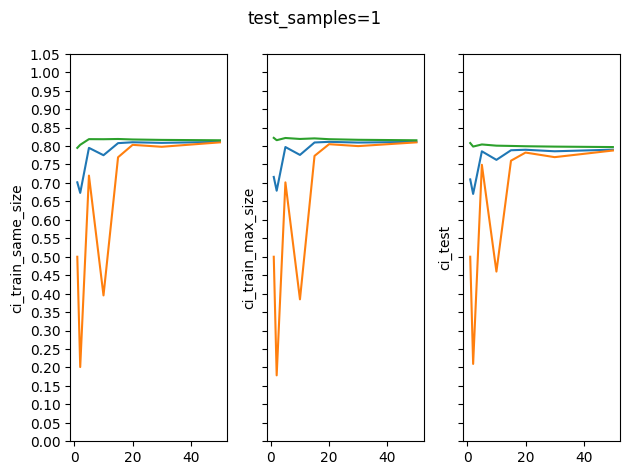

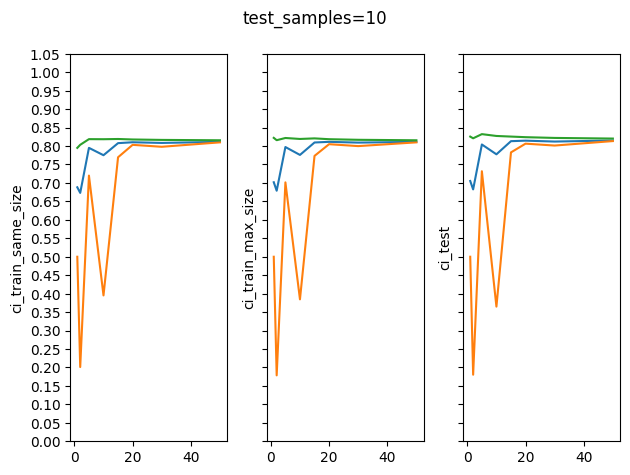

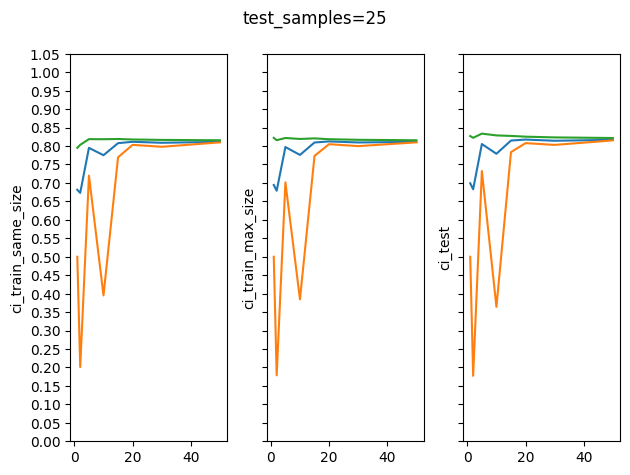

In [14]:
from modules.constants import TEST_GRID
for test_samples in TEST_GRID:
    fig, ax = plt.subplots(1, 3, sharey=True, tight_layout=True)
    fig.suptitle(f'test_samples={test_samples}')
    draw_pandas_plot(df, 'ci_train_same_size', np.arange(0.0, 1.1, 0.05), test_samples=test_samples, ax = ax[0])
    draw_pandas_plot(df, 'ci_train_max_size', np.arange(0.0, 1.1, 0.05), test_samples=test_samples,ax = ax[1])
    draw_pandas_plot(df, 'ci_test', np.arange(0.0, 1.1, 0.05), test_samples=test_samples,ax=ax[2])

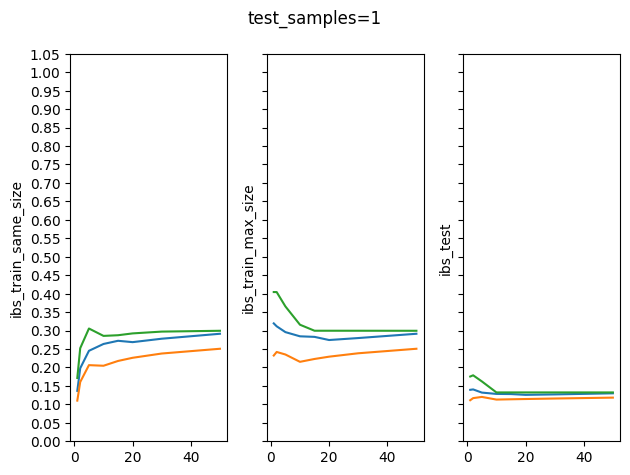

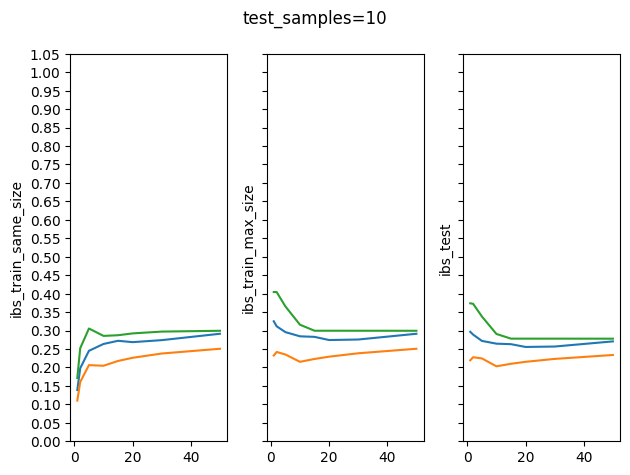

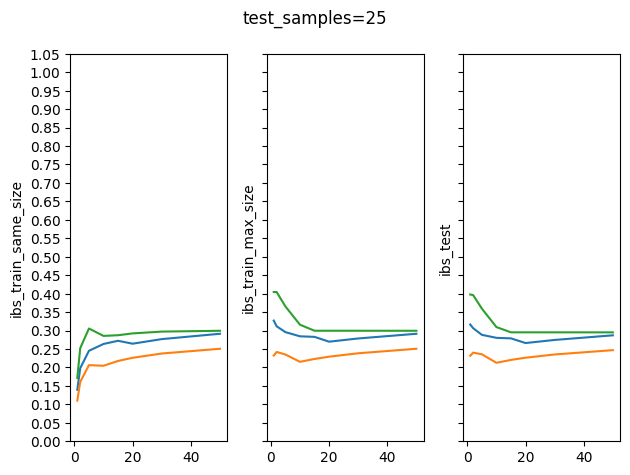

In [15]:
from modules.constants import TEST_GRID
for test_samples in TEST_GRID:
    fig, ax = plt.subplots(1, 3, sharey=True, tight_layout=True)
    fig.suptitle(f'test_samples={test_samples}')
    draw_pandas_plot(df, 'ibs_train_same_size', np.arange(0.0, 1.1, 0.05), test_samples=test_samples, ax = ax[0])
    draw_pandas_plot(df, 'ibs_train_max_size', np.arange(0.0, 1.1, 0.05), test_samples=test_samples,ax = ax[1])
    draw_pandas_plot(df, 'ibs_test', np.arange(0.0, 1.1, 0.05), test_samples=test_samples,ax=ax[2])

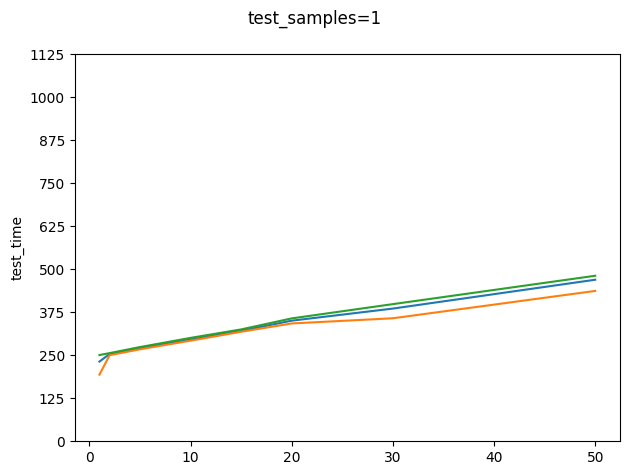

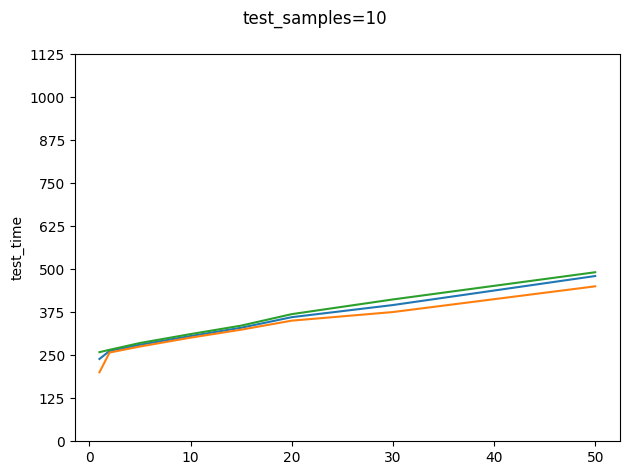

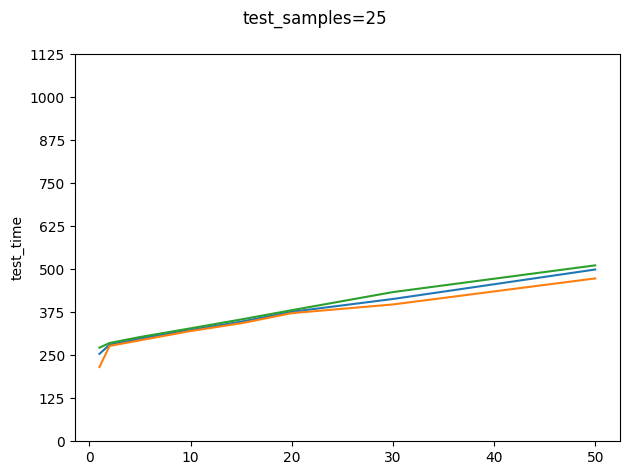

In [16]:
from modules.constants import TEST_GRID
for test_samples in TEST_GRID:
    fig, ax = plt.subplots(1, sharey=True, tight_layout=True)
    fig.suptitle(f'test_samples={test_samples}')
    draw_pandas_plot(df, 'test_time', np.arange(0, 1250, 125), test_samples=test_samples, ax = ax)

0

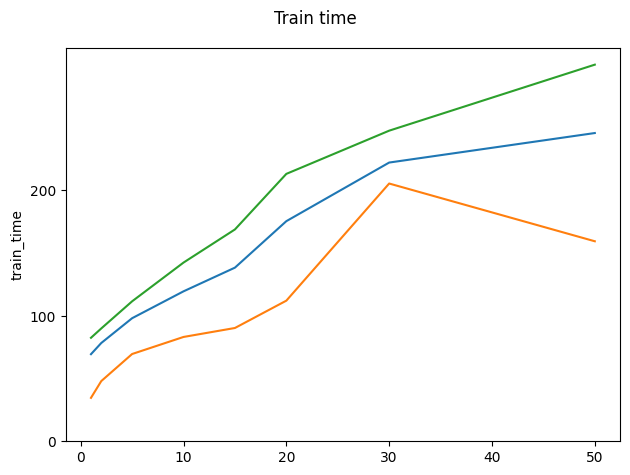

In [140]:
from modules.constants import TEST_GRID
fig, ax = plt.subplots(1, sharey=True, tight_layout=True)
fig.suptitle(f'Train time')
draw_pandas_plot(df, 'train_time', np.arange(0, 300, 100), test_samples=test_samples, ax = ax)

0

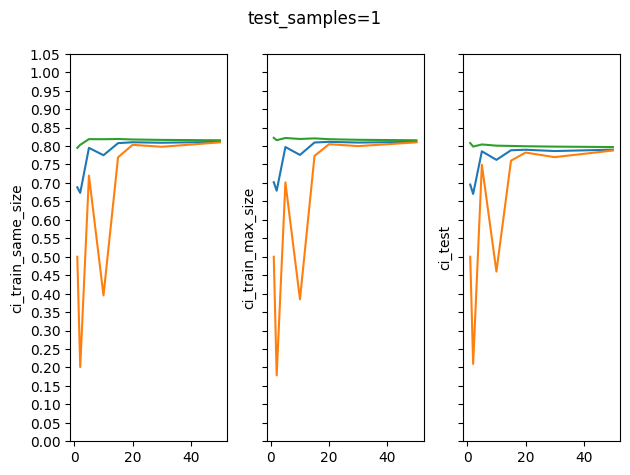

In [141]:
fig, ax = plt.subplots(1, 3, sharey=True, tight_layout=True)
fig.suptitle('test_samples=1')
draw_pandas_plot(df, 'ci_train_same_size', np.arange(0.0, 1.1, 0.05), ax = ax[0])
draw_pandas_plot(df, 'ci_train_max_size', np.arange(0.0, 1.1, 0.05), ax = ax[1])
draw_pandas_plot(df, 'ci_test', np.arange(0.0, 1.1, 0.05), ax=ax[2])

0

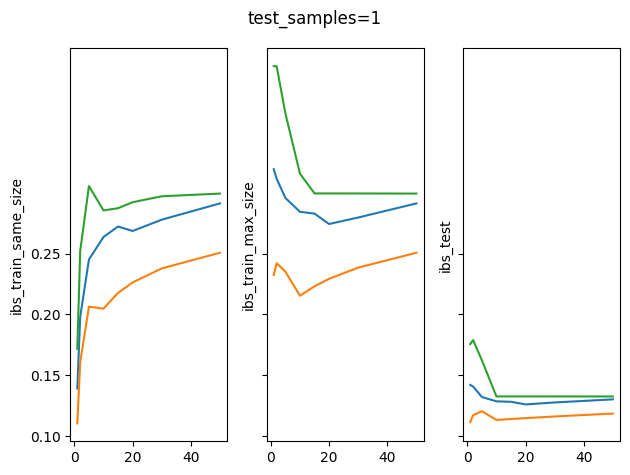

In [142]:
fig, ax = plt.subplots(1, 3, sharey=True, tight_layout=True)
fig.suptitle('test_samples=1')
draw_pandas_plot(df, 'ibs_train_same_size', np.arange(0.1, 0.3, 0.05), ax=ax[0])
draw_pandas_plot(df, 'ibs_train_max_size', np.arange(0.1, 0.3, 0.05), ax=ax[1])
draw_pandas_plot(df, 'ibs_test', np.arange(0.1, 0.3, 0.05), ax=ax[2])


In [143]:
df_top = df.sort_values(by='ibs_train_same_size', ascending=True).groupby('train_samples').head(7)

In [86]:
def draw_mean_plot(df, metric, ticks, test_samples=1, ax=None):
    metric_df = df[df['test_samples'] == test_samples].groupby('train_samples')[metric].agg(['mean'])
    if not ax is None:
        ax.plot(metric_df)
        ax.set_yticks(ticks)
        ax.set_ylabel(metric)
        return 0
    return plt.plot(metric_df)

0

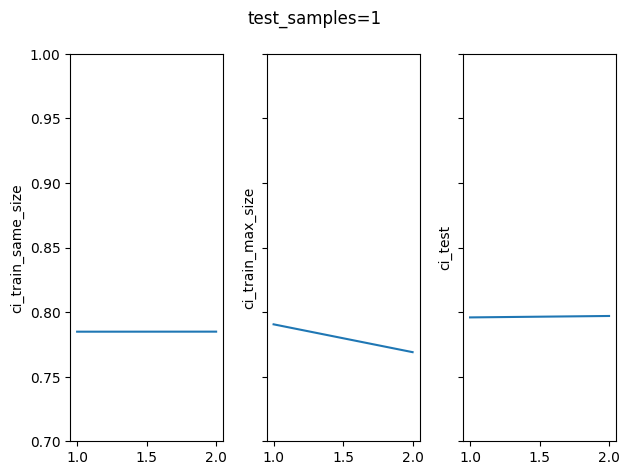

In [87]:
fig, ax = plt.subplots(1, 3, sharey=True, tight_layout=True)
fig.suptitle('test_samples=1')
draw_mean_plot(df_top, 'ci_train_same_size', np.arange(0.7, 1, 0.05), ax=ax[0])
draw_mean_plot(df_top, 'ci_train_max_size', np.arange(0.7, 1, 0.05), ax=ax[1])
draw_mean_plot(df_top, 'ci_test', np.arange(0.7, 1, 0.05), ax=ax[2])

0

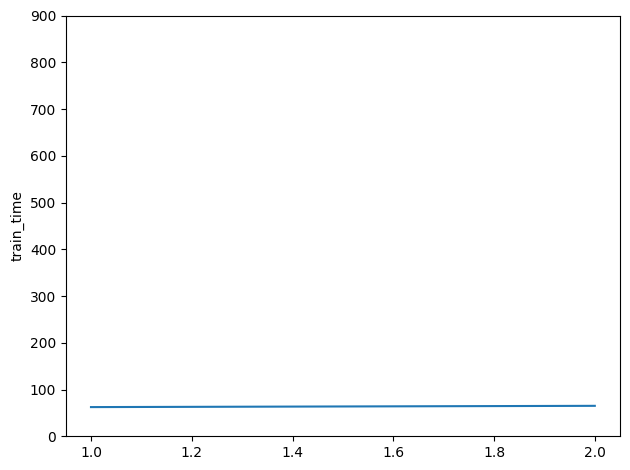

In [88]:
fig, ax = plt.subplots(1, sharey=True, tight_layout=True)
draw_mean_plot(df_top, 'train_time', np.arange(0, 1000, 100), ax=ax)

In [52]:
fig, ax = plt.subplots(1, 3, sharey=True, tight_layout=True)
fig.suptitle('test_samples=1')
draw_mean_plot(df_top, 'ibs_train_same_size', np.arange(0.1, 0.50, 0.05), ax=ax[0])
draw_mean_plot(df_top, 'ibs_train_max_size', np.arange(0.1, 0.50, 0.05), ax=ax[1])
draw_mean_plot(df_top, 'ibs_test', np.arange(0.1, 0.50, 0.05), ax=ax[2])a

SyntaxError: invalid syntax (1945296070.py, line 5)

0

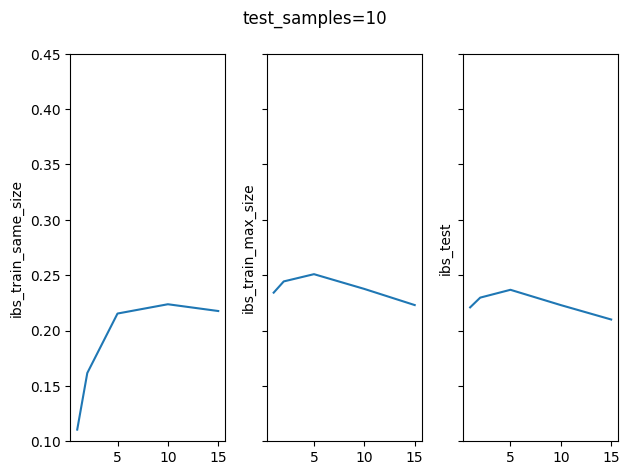

In [53]:
fig, ax = plt.subplots(1, 3, sharey=True, tight_layout=True)
fig.suptitle('test_samples=10')
draw_mean_plot(df_top, 'ibs_train_same_size', np.arange(0.1, 0.50, 0.05),test_samples=10, ax=ax[0])
draw_mean_plot(df_top, 'ibs_train_max_size', np.arange(0.1, 0.50, 0.05), test_samples=10,ax=ax[1])
draw_mean_plot(df_top, 'ibs_test', np.arange(0.1, 0.50, 0.05), test_samples=10,ax=ax[2])

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig.suptitle('test_samples=25')
draw_pandas_plot(df, 'ci_train', np.arange(0.4, 1.1, 0.05), test_samples=25, ax = ax[0])
draw_pandas_plot(df, 'ci_test', np.arange(0.4, 1.1, 0.05), test_samples=25, ax=ax[1])

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig.suptitle('test_samples=25')
draw_pandas_plot(df, 'ibs_train', np.arange(0.1, 1.1, 0.05), test_samples=25, ax = ax[0])
draw_pandas_plot(df, 'ibs_test', np.arange(0.1, 1.1, 0.05), test_samples=25, ax=ax[1])

In [ ]:
import plotly.express as px

In [ ]:
def draw_plotly_plot(df, metric):
    df_grouped = df.groupby('n_samples')[metric]
    metric_df = df.groupby('n_samples')[metric].agg(['mean', 'min', 'max']).reset_index()
    fig = px.line(
    metric_df, x='n_samples', y='mean', 
    error_y=metric_df['max'] - metric_df['mean'], 
    error_y_minus=metric_df['mean'] - metric_df['min'], 
    title=f"График зависимости {metric_df} от n_samples",
    labels={'n_samples': 'Количество выборок', 'mean': f'Среднее значение {metric}'}
)
    return fig

In [17]:
draw_plotly_plot(df, 'ci_train')

KeyError: 'n_samples'

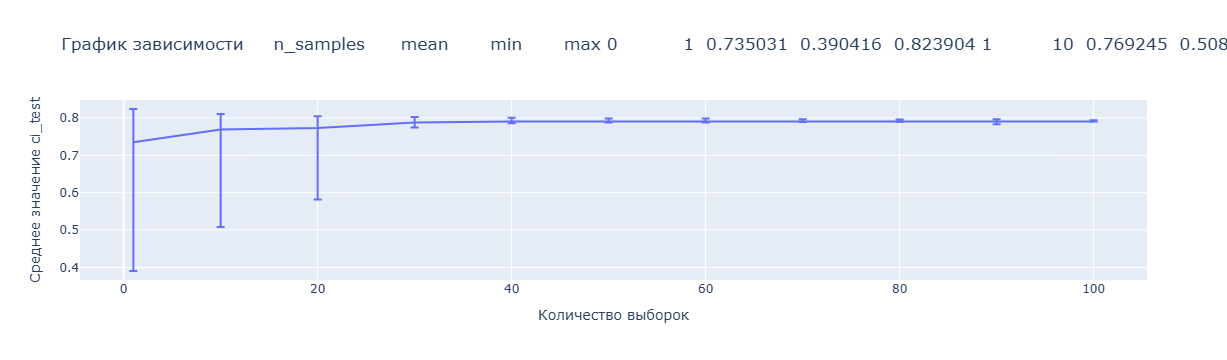

In [19]:
draw_plotly_plot(df, 'ci_test')

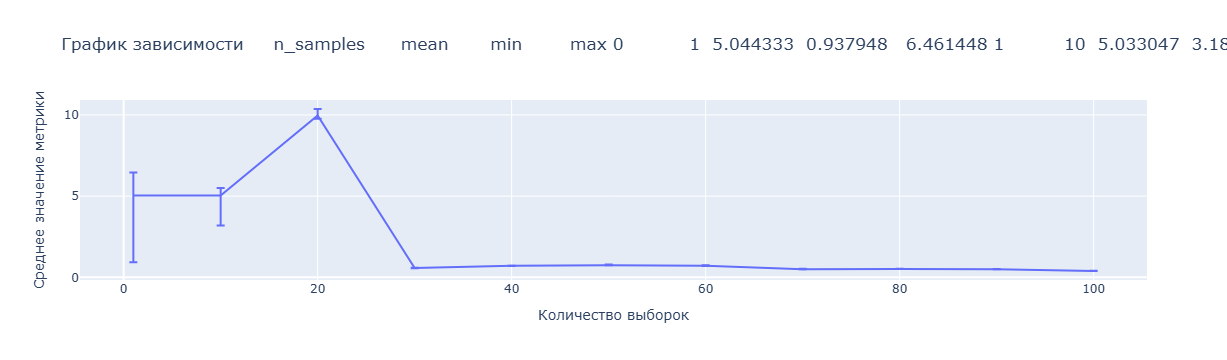

In [92]:
draw_plotly_plot(df, 'ibs_test')